<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Matias/blob/main/Informe_Algoritmo_Corte_De_Varilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema del Corte de Varilla

Este problema consiste en como conseguir el valor de coste máximo a la hora de vender una varilla por partes.

Este tipo de problemas son dificiles de trabajar gracias a la complejidad que estos tienen, a pesar de todo ha habido gente que los ha intentado resolver consiguiendo algoritmo con una complejidad de $O(2^n)$ lo cual toma mucho tiempo si es que queremos conseguir el valor máximo para varillas demasiado largas. Por esta misma razón se ha decidido cambiar la forma de ver las cosas, osea realizar un cambio de paradigma el cual es conocido como la programación dinámica.

Este tipo de programación consiste en reducir el tiempo de un algoritmo mediante utilización de estructuras óptimas las cuales irán almacenando información para no realizar calculos de más o nos ayudarán a encontrar el camino más corto hacia nuesto objetivo. Por esta misma razón resolveremos este problema con este nuevo paradigma.

Entrada: Recibe una secuenca de $n$ números $[a_1,a_2,...,a_n]$ el cual contiene el precio de cada largo de la varilla.

Salida: Retorna del valor máximo en la que se puede vender la varilla al ser cortada o no.

#2. Corte de varilla (Recursivo)
##2.1 Descripción del Algoritmo

Este algoritmo es una de las formas en las que se puede resolver este problema, a pesar de no ser la más optima por su complejidad $O(n^2)$ logrará obtener los resultados que deseamos.

Lo primero que realiza este algoritmo es definir un $maxValue$ como el primer valor dentro de nuestra lista de precios y luego empieza a recorrer esta lista para llegar al valor máximo de nuestro problema. Para realizar esta acción el algoritmo explora cada combinación que se puede econtrar, por ejemplo, si tenemos un arreglo de largo 4, el primer corte que se podría realizar vendría siendo de 3, 2, 1 o directamente no realizar ninguno, luego el algortimo seguirá viendo cuantos cortes se podrían llegar a realizar a partir de los enviados de forma recurisva.

Al realizar esta acción iremos calculando valores que ya fueron vistos en otras llamadas recurisvas de nuestra función lo cual provoca que hagamos calculos innecesarios y la complejidad de nuestro algoritmo aumente.

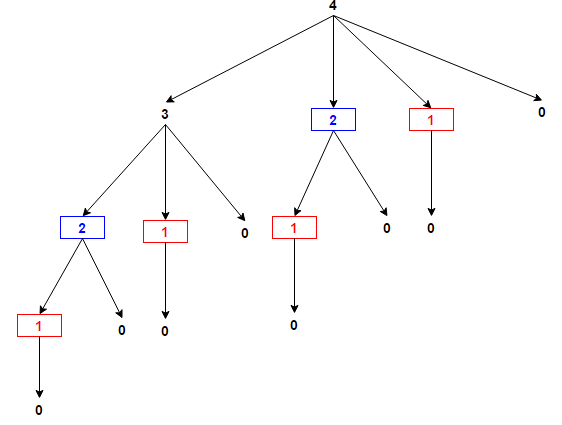

##2.2 Código del algoritmo recursivo

In [2]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored

In [4]:
def corteDeVarillaRecursivo(precio, n):
    if (n == 0): return 0

    maxValue = precio[0]

    for i in range(1, n + 1):
        costo = precio[i - 1] + corteDeVarillaRecursivo(precio, n - i);

        if costo > maxValue:
            maxValue = costo

    return maxValue

##2.3 Descripción algortimo con programación Dinamica

Este algoritmo viene siendo la mejor forma de poder resolver nuestro problema, ya que al igual que en el algoritmo recursivo, iremos calculando cada combinación que nos iremos encontrando, la difenrencia de este con el anterior es que el algoritmo con programación dinámica utiliza como estructura óptima una lista en la cual se irán almacenando los valores que ya han sido calculados anteriormente, de este forma no tendrémos que realizar los mismo calculos una y otra vez en cada llamada de nuestra función lo cual ayudará a que disminuya en gran medida nuestra complejidad.

Como se puede apreciar en el siguiente código, lo primero que realiza nuestro algoritmo es generar un arreglo auxiliar de largo $n + 1$ el cual irá almacenando todos los posibles valores que pueden tomar nuestros cortes, y por último empieza a recorrer el arreglo con los precios recibidos.

El primer ciclo el cual depende de $i$ irá iterando en todos los posibles largos de nuestra varilla y el segundo ciclo irá iternado en todos los posibles cortes que se le pueden hacer a la varilla de largo $i$ para luego almacenar el valor máximo en la última posición de nuestro arreglo de ganancias.

Una desventaja que tiene este algorimo en comparación al algoritmo recursivo es que este necesita de una estructura auxiliar la cual irá almacenando las ganancias lo cual provoca que tenga una complejidad espacial de $O(n)$.

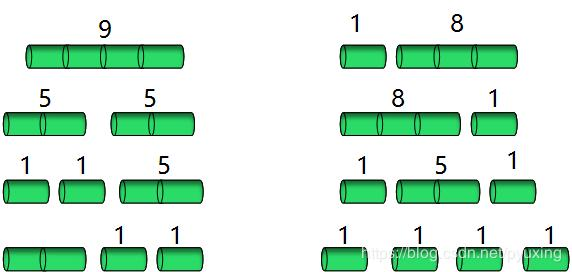

#2.4 Código del algoritmo con programación dinámica

In [6]:
def corteDeVarillaDinamico(precio, n):
    ganancias = [0] * (n + 1)

    for i in range(1, n + 1):
        
        for j in range(1, i + 1):
            ganancias[i] = max(ganancias[i], precio[j - 1] + ganancias[i - j])
    
    return ganancias[n]

In [12]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

A = cutrod_instance_generator(10)
print(corteDeVarillaRecursivo(A, len(A)))
print(corteDeVarillaDinamico(A, len(A)))

40
40
